<a href="https://colab.research.google.com/github/kingcodes02/Time-Series-Forcasting/blob/main/03%20-%20Regression_for_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.python.framework.config import list_physical_devices
# Import TensorFlow into Colab
import tensorflow as tf
# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSSS!!!!!)


In [3]:
f

In [4]:
os.chdir("/content/drive/MyDrive/complete-time-series/4-Forecasting_with_regression")

In [5]:
ls data

sales_data.csv


In [6]:
df = pd.read_csv('./data/sales_data.csv')

In [7]:
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Years   72 non-null     object 
 1   Sales   72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


Data Preprocessing

In [9]:
# convert the Years datatype to datatime
df['Years'] = pd.to_datetime(df['Years'])

In [10]:
df.dtypes

Years    datetime64[ns]
Sales           float64
dtype: object

In [11]:
df['time'] = np.arange(1, 73, 1)

In [12]:
df.head()

,Years,Sales,time
0,2001-01-01,139.7,1
1,2001-02-01,114.3,2
2,2001-03-01,101.6,3
3,2001-04-01,152.4,4
4,2001-05-01,215.9,5


In [13]:
df['month_name'] = df['Years'].dt.month_name()

In [14]:
df.head(15)

,Years,Sales,time,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May
5,2001-06-01,228.6,6,June
6,2001-07-01,215.9,7,July
7,2001-08-01,190.5,8,August
8,2001-09-01,177.8,9,September
9,2001-10-01,139.7,10,October


**split the data into independent and dependent**

In [15]:
# Step-1: Split the data into train (4 years) and test (2 years)
df_train = df.head(48) # 4 years
df_test = df.loc[48:] # 2 years

In [16]:
df_train.tail()

,Years,Sales,time,month_name
43,2004-08-01,431.8,44,August
44,2004-09-01,330.2,45,September
45,2004-10-01,330.2,46,October
46,2004-11-01,304.8,47,November
47,2004-12-01,292.1,48,December


In [17]:
df_test.head()

,Years,Sales,time,month_name
48,2005-01-01,266.7,49,January
49,2005-02-01,317.5,50,February
50,2005-03-01,368.3,51,March
51,2005-04-01,431.8,52,April
52,2005-05-01,457.2,53,May


In [18]:
x_train = df_train[['time']].values
x_train.shape

(48, 1)

In [19]:
y_train = df_train[['Sales']].values
y_train.shape

(48, 1)

In [20]:
x_test = df_test[['time']].values
y_test = df_test[['Sales']].values

# Linear Regression with Time
* Trend in the data

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model_trend = LinearRegression()
model_trend.fit(x_train, y_train)

LinearRegression()

In [23]:
y_fittedvalue = model_trend.predict(x_train)

In [24]:
y_forecast = model_trend.predict(x_test)

**confidence interval - 95% = 1.96**

CI = $\mu +- ME $

- ME = z * SE
- z = 1.96 (for 95% CI)
- SE = stanadard deviation of the error

In [25]:
# confidence interval
# mean +- Margin of error
error = y_train - y_fittedvalue
se = error.std()
ME = 1.96 * se

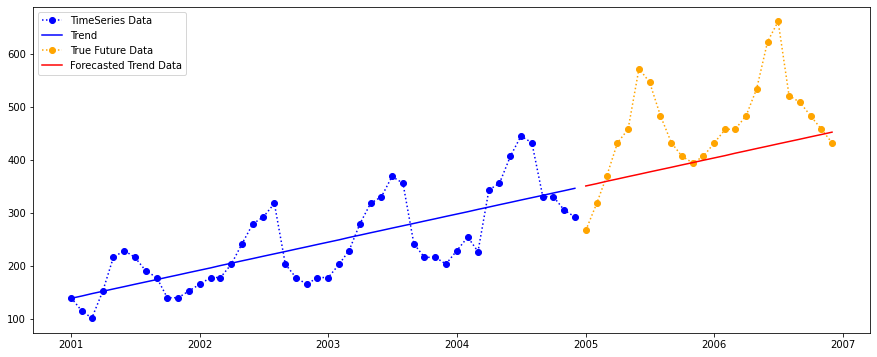

In [26]:
# visualize the data
plt.figure(figsize=(15, 6))
plt.plot(df_train['Years'], y_train, 'bo:')
plt.plot(df_train['Years'], y_fittedvalue, 'b')

# forcasted data
plt.plot(df_test['Years'], y_test, 'o:', color='orange')
plt.plot(df_test['Years'], y_forecast, 'b', color='red')

# margin of error
# ci_plus = y_forecast + ME
# ci_minus = y_forecast - ME
# plt.fill_between(df_test['Years'], (ci_plus), (ci_,inus), alpha=0.1)

plt.legend(['TimeSeries Data', 'Trend', 'True Future Data', 'Forecasted Trend Data']);

In [27]:
# 2006-01-01	431.8	61
forecast_mean = model_trend.predict(np.array([[61]]))

In [28]:
print(forecast_mean)
print((forecast_mean - ME, forecast_mean + ME))

[[403.28613765]]
(array([[291.67694148]]), array([[514.89533381]]))


# Additive Model

In [29]:
df_train.head()

,Years,Sales,time,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


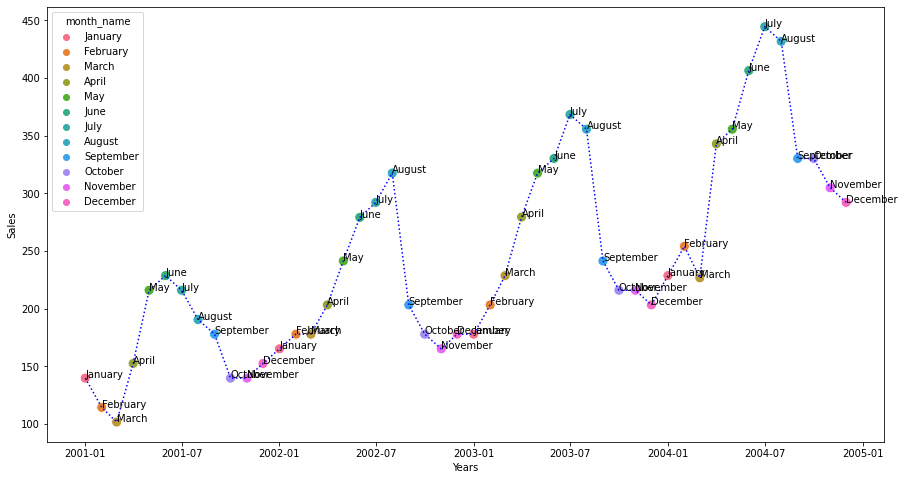

In [30]:
plt.figure(figsize=(15, 8))
# plt.scatter(df_train['Years'], df_train['Sales']);
plt.plot(df_train['Years'], df_train['Sales'], 'b:')
sns.scatterplot('Years', 'Sales', data=df_train, s=100, hue='month_name');

for i in range(len(df_train)):
  plt.text(df_train['Years'][i], df_train['Sales'][i], df_train['month_name'][i])

seasonality is 12 hence we need to create n-1 dummies, 11 columns

In [31]:
dum = pd.get_dummies(df_train['month_name'], drop_first=True)
df_train1 = df_train.copy()
df_train1 = pd.concat((df_train1, dum), axis=1)

In [32]:
df_train1.head()

,Years,Sales,time,month_name,August,December,February,January,July,June,March,May,November,October,September
0,2001-01-01,139.7,1,January,0,0,0,1,0,0,0,0,0,0,0
1,2001-02-01,114.3,2,February,0,0,1,0,0,0,0,0,0,0,0
2,2001-03-01,101.6,3,March,0,0,0,0,0,0,1,0,0,0,0
3,2001-04-01,152.4,4,April,0,0,0,0,0,0,0,0,0,0,0
4,2001-05-01,215.9,5,May,0,0,0,0,0,0,0,1,0,0,0


In [33]:
dum = pd.get_dummies(df_test['month_name'], drop_first=True)
df_test1 = df_test.copy()
df_test1 = pd.concat((df_test1, dum), axis=1)

In [34]:
df_test1.head()

,Years,Sales,time,month_name,August,December,February,January,July,June,March,May,November,October,September
48,2005-01-01,266.7,49,January,0,0,0,1,0,0,0,0,0,0,0
49,2005-02-01,317.5,50,February,0,0,1,0,0,0,0,0,0,0,0
50,2005-03-01,368.3,51,March,0,0,0,0,0,0,1,0,0,0,0
51,2005-04-01,431.8,52,April,0,0,0,0,0,0,0,0,0,0,0
52,2005-05-01,457.2,53,May,0,0,0,0,0,0,0,1,0,0,0


In [35]:
# split the data - independent and dependent
cols = ['time', 'August', 'December',	'February',	'January',	'July',	'June',	'March',	'May',
        'November',	'October',	'September']
x_train_add = df_train1[cols].values
x_test_add = df_test1[cols].values
y_train_add = df_train1['Sales'].values
y_test_add = df_test1['Sales'].values

In [36]:
x_train_add.shape, x_test_add.shape, y_train_add.shape, y_test_add.shape

((48, 12), (24, 12), (48,), (24,))

**Additive Model (Linear Regression)**

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model_add = LinearRegression()
model_add.fit(x_train_add, y_train_add)

LinearRegression()

In [39]:
# fitted values
y_fittedvalue_add = model_add.predict(x_train_add)
# forecasted values
y_forecast_add = model_add.predict(x_test_add)

In [40]:
# margin of error
# ME = 1.96 * SE
error_std = y_train_add - y_fittedvalue_add
SE = error.std()
ME = 1.96 * SE

In [41]:
ME

111.6091961636738

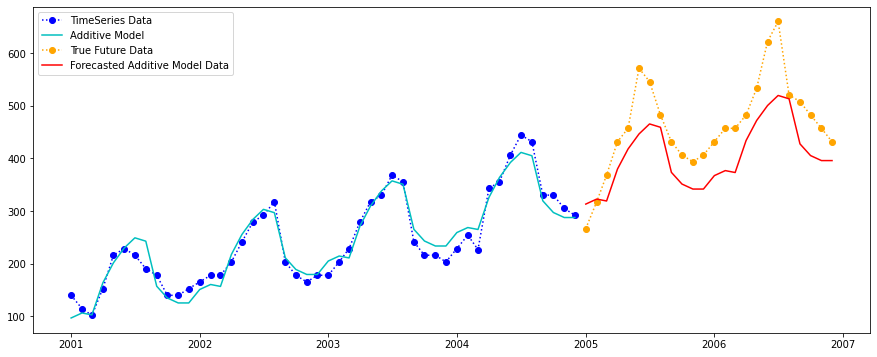

In [42]:
# visualize the data
plt.figure(figsize=(15, 6))
plt.plot(df_train1['Years'], y_train_add, 'bo:')
plt.plot(df_train1['Years'], y_fittedvalue_add, 'c')

# forcasted data
plt.plot(df_test1['Years'], y_test_add, 'o:', color='orange')
plt.plot(df_test1['Years'], y_forecast_add, 'b', color='red')

# margin of error
# ci_plus = y_forecast_add + ME
# ci_minus = y_forecast_add - ME
# plt.fill_between(df_test['Years'], (ci_plus), (ci_minus), alpha=0.1)

plt.legend(['TimeSeries Data', 'Additive Model', 'True Future Data', 'Forecasted Additive Model Data']);

# Multiplicative Model for Forecasting

In [44]:
df_train.tail()

,Years,Sales,time,month_name
43,2004-08-01,431.8,44,August
44,2004-09-01,330.2,45,September
45,2004-10-01,330.2,46,October
46,2004-11-01,304.8,47,November
47,2004-12-01,292.1,48,December


In [45]:
df_test.head()

,Years,Sales,time,month_name
48,2005-01-01,266.7,49,January
49,2005-02-01,317.5,50,February
50,2005-03-01,368.3,51,March
51,2005-04-01,431.8,52,April
52,2005-05-01,457.2,53,May


**Step-1: Linear Regression with time series**

In [46]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

In [47]:
X_t = df_train2[['time']].values
y_true_mul = df_train2['Sales'].values

X_t.shape, y_true_mul.shape

((48, 1), (48,))

In [48]:
X_t_test = df_test2[['time']].values
y_true_test_mul = df_test2['Sales'].values

X_t_test.shape, y_true_test_mul.shape

((24, 1), (24,))

In [49]:
from sklearn.linear_model import LinearRegression
model_trend_mul = LinearRegression()
model_trend_mul.fit(X_t, y_true_mul)

LinearRegression()

**Step-2: Take Trend (T) and True Sample (TSI)**

In [51]:
y_fittedvalues_trend = model_trend_mul.predict(X_t)

In [52]:
df_train2['predicted_T'] = y_fittedvalues_trend
df_train2.head()

,Years,Sales,time,month_name,predicted_T
0,2001-01-01,139.7,1,January,138.671939
1,2001-02-01,114.3,2,February,143.082175
2,2001-03-01,101.6,3,March,147.492412
3,2001-04-01,152.4,4,April,151.902649
4,2001-05-01,215.9,5,May,156.312885


**Step-3: Deviation to TSI**

SI = $\frac{TSI}{T}$

In [53]:
df_train2['SI'] = df_train2['Sales'] / df_train2['predicted_T']
df_train2.head(20)

,Years,Sales,time,month_name,predicted_T,SI
0,2001-01-01,139.7,1,January,138.671939,1.007414
1,2001-02-01,114.3,2,February,143.082175,0.798842
2,2001-03-01,101.6,3,March,147.492412,0.688849
3,2001-04-01,152.4,4,April,151.902649,1.003274
4,2001-05-01,215.9,5,May,156.312885,1.381204
5,2001-06-01,228.6,6,June,160.723122,1.422322
6,2001-07-01,215.9,7,July,165.133359,1.307428
7,2001-08-01,190.5,8,August,169.543595,1.123605
8,2001-09-01,177.8,9,September,173.953832,1.022110
9,2001-10-01,139.7,10,October,178.364069,0.783229


**Step-4: Avg Seasonal Deviation**

In [60]:
deviation_season = df_train2[['month_name', 'SI']].groupby(by='month_name').mean().rename(columns={'SI':'correction_factor'})
deviation_season

,correction_factor
month_name,
April,1.045770
August,1.289315
December,0.773112
February,0.840934
January,0.841208
July,1.344616
June,1.309853
March,0.804644
May,1.218536


**Step-5: Computing the Fitted Values**

In [62]:
df_train2 = df_train2.merge(deviation_season, on='month_name')

In [63]:
df_train2.head()

,Years,Sales,time,month_name,predicted_T,SI,correction_factor
0,2001-01-01,139.7,1,January,138.671939,1.007414,0.841208
1,2002-01-01,165.1,13,January,191.594779,0.861715,0.841208
2,2003-01-01,177.8,25,January,244.517618,0.727146,0.841208
3,2004-01-01,228.6,37,January,297.440458,0.768557,0.841208
4,2001-02-01,114.3,2,February,143.082175,0.798842,0.840934


In [64]:
df_train2['Fitted_values'] = df_train2['predicted_T'] * df_train2['correction_factor']

In [65]:
df_train2.head()

,Years,Sales,time,month_name,predicted_T,SI,correction_factor,Fitted_values
0,2001-01-01,139.7,1,January,138.671939,1.007414,0.841208,116.651919
1,2002-01-01,165.1,13,January,191.594779,0.861715,0.841208,161.171026
2,2003-01-01,177.8,25,January,244.517618,0.727146,0.841208,205.690132
3,2004-01-01,228.6,37,January,297.440458,0.768557,0.841208,250.209239
4,2001-02-01,114.3,2,February,143.082175,0.798842,0.840934,120.322726


**Forecasting**

In [66]:
ftrend = model_trend_mul.predict(X_t_test)
df_test2['Forecasted_Trend'] = ftrend
df_test.head()

,Years,Sales,time,month_name
48,2005-01-01,266.7,49,January
49,2005-02-01,317.5,50,February
50,2005-03-01,368.3,51,March
51,2005-04-01,431.8,52,April
52,2005-05-01,457.2,53,May


In [67]:
df_test2 = pd.merge(df_test2, deviation_season, on='month_name')
df_test2.head()

,Years,Sales,time,month_name,Forecasted_Trend,correction_factor
0,2005-01-01,266.7,49,January,350.363298,0.841208
1,2006-01-01,431.8,61,January,403.286138,0.841208
2,2005-02-01,317.5,50,February,354.773535,0.840934
3,2006-02-01,457.2,62,February,407.696374,0.840934
4,2005-03-01,368.3,51,March,359.183771,0.804644


In [69]:
df_test2['Forecasted_mul'] = df_test2['Forecasted_Trend'] * df_test2['correction_factor']
df_test2.head()

,Years,Sales,time,month_name,Forecasted_Trend,correction_factor,Forecasted_mul
0,2005-01-01,266.7,49,January,350.363298,0.841208,294.728346
1,2006-01-01,431.8,61,January,403.286138,0.841208,339.247452
2,2005-02-01,317.5,50,February,354.773535,0.840934,298.341276
3,2006-02-01,457.2,62,February,407.696374,0.840934,342.845914
4,2005-03-01,368.3,51,March,359.183771,0.804644,289.015154


In [70]:
# margin error (train)
# ME = 1.96 * SE
# SE = 
error = df_train2['Sales'] - df_train2['Fitted_values']
SE = error.std()
ME = 1.96 * SE
print(ME)

36.42544715050407


In [73]:
df_train2.sort_values(by='Years', inplace=True)
df_test2.sort_values(by='Years', inplace=True)

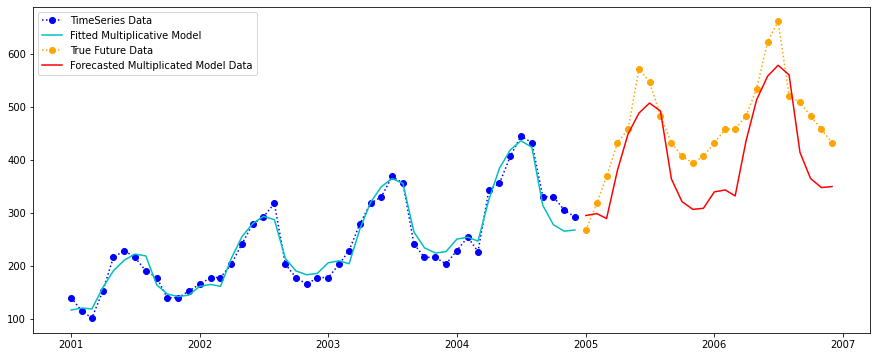

In [74]:
# visualize the data
plt.figure(figsize=(15, 6))
plt.plot(df_train2['Years'], df_train2['Sales'], 'bo:')
plt.plot(df_train2['Years'], df_train2['Fitted_values'], 'c') # fitted

# forcasted data
plt.plot(df_test2['Years'], df_test2['Sales'], 'o:', color='orange')
plt.plot(df_test2['Years'], df_test2['Forecasted_mul'], 'b', color='red')

# margin of error
# ci_plus = df_test2['Forecasted_mul'] + ME
# ci_minus = df_test2['Forecasted_mul'] - ME
# plt.fill_between(df_test['Years'], (ci_plus), (ci_minus), alpha=0.1)

plt.legend(['TimeSeries Data', 'Fitted Multiplicative Model', 'True Future Data', 'Forecasted Multiplicated Model Data']);